# ML for Control System Classification

## Introduction

The system identification problem is one of key problems for any systems with feedback. In this exercise, we are going investigate how machine learning (ML) can be used to solve such problems.

We are going to use power conversion as a real-world example. One of the most important metrics of any power management system is its **stability**. For example, in your laptop there is a power management IC (PMIC) that takes the 5 Volt from the wall charger and output a constant voltage for the CPU (usually 1.0-1.3 V). This voltage that goes into the CPU must be as stable as possible (high stability), under all kinds of processing tasks.

The figure below illustrates the problem. When there is any variation happening at the input side of the PMIC (such as a step), we look at the **output voltage waveform** for evaluating its stability before it goes into the CPU.

<img src="coding_exercise.jpg" width="500">

PMIC engineers have complicated methods to measure such output voltage waveforms and characterize them as *stable* or *unstable*. We want to see if ML can make their life easier!

In this exercise, we will use a dataset that was collected on ADI's high performance digital PMICs, called the [µModules](https://www.analog.com/en/product-category/umodule-regulators.html). The goal is to develop a ML model that can classify whether a output voltage waveform is stable or not, so that we won't burn the CPU!

The datasets consist of pairs of output voltage waveforms and their labels:
- *voltage*: has shape (N, 8192), where N is the number of measured waveforms, and 8192 is the length of each waveform, as they are 1D time series. `voltage` is the output voltage waveform shown above.
- *label*: has shape (N,). `label` ∈ {0, 1}, where 0 means unstable and 1 means stable.
- *vout*: has shape (N,). `vout` is the "steady-state" values of each output voltage waveforms.

## Completing the Coding Exercise

You will be asked to go through the following 5 sub-problems. And we provide some guidance on what you should do in each of the sub-problem, as well as some skeleton code to get you started.

You can insert your code in the corresponding sections with the best coding practice that you can follow (format, comment, etc). And then you should execute those cells to get the result. You can add any visualization to help illustrate your workflow and observation. The completed notebook should be clear and readable as a report.

After you complete all the sub-problems, you should save the notebook and then download it with

```
File -> Download -> Download .ipynb
```

Please submit the downloaded `.ipynb` file via email for grading.

**Note I**: You can use any ML algorithms. If you choose to work with neural networks, it's recommended to enable GPU or TPU in Colab before starting the exercise. In Colab, simply select:

```
Runtime -> Change Runtime Type -> GPU
```

**Note II**: This exercise is open-ended. There is no right answer, neither it is a "competition" on the final accuracy. Instead, your submission will be scored based on your practical approaches to an ML problem, thinking process, and coding style.

First, download the training and test dataset using the token provided to you. Please reach out to us if you met any problems downloading the datasets.


In [ ]:
# token = <PUT THE TOKEN SENT TO YOU VIA EMAIL>

data_train_url = 'https://analoggarage.blob.core.windows.net/coding-test/data/data_train.pkl'
data_test_url = 'https://analoggarage.blob.core.windows.net/coding-test/data/data_test.pkl'

!wget -O data_train.pkl "$data_train_url$token"
!wget -O data_test.pkl "$data_test_url$token"

## Problem 1. Load Dataset

In this section, we will provide you the example to load the test dataset and visualize some of the data. Please investigate the data as you wish and make some visualizations of the data. And make comments on any of your observations below:

< My observations >

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
# Load data
with open('./data_test.pkl', 'rb') as f:
    data_test = pickle.load(f)

print('Test set:')
print('  voltage:', data_test['voltage'].shape)
print('  label:', data_test['label'].shape)
print('  vout:', data_test['vout'].shape)

Test set:
  voltage: (6000, 8192)
  label: (6000,)
  vout: (6000,)


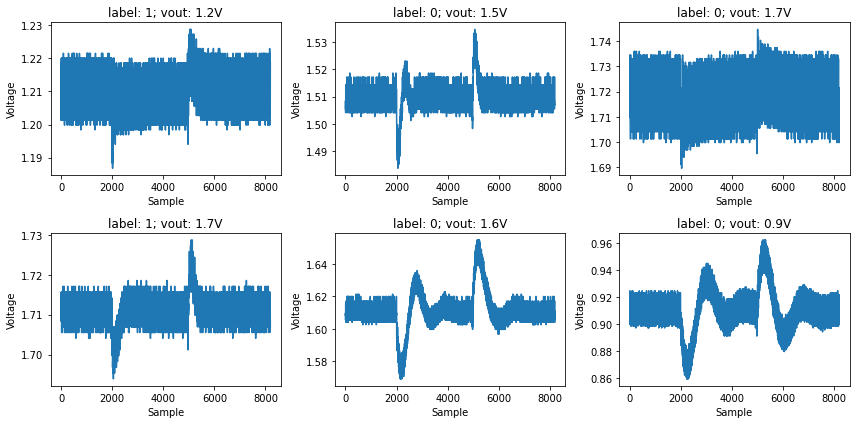

In [ ]:
# Plot some data from the test dataset
_, axes = plt.subplots(2, 3, figsize=(12, 6))
indices = np.random.choice(6000, 6, replace=False)

for i in range(6):
    v = data_test['voltage'][indices[i], :]
    label = data_test['label'][indices[i]]
    vout = data_test['vout'][indices[i]]

    ax = axes[i // 3][i % 3]
    ax.plot(v)
    ax.set_title(f'label: {int(label):d}; vout: {vout:.1f}V')

    ax.set_xlabel('Sample')
    ax.set_ylabel('Voltage')

plt.tight_layout()
plt.show()

## Problem 2. Prepare Dataset

In this section, let's preprocess and prepare the dataset for your ML model.

- By inspection, you may have noticed that `vout` is different from the voltage waveforms. `vout` is the mean voltage before and after the dynamic behaviors happen. Substract `vout` from `voltage` in training and test data.

- The voltage waveforms are quite long with `L = 8192`, because it's oversampled during measurement. We can downsample the data, say by 16 times (or more). You can take a downsampling technique of your choice. For example, you can use `scipy.signal.decimate`.

- [Optional] You can do any other preprocessing techniques that you see fit before building a model. Please explain what you did.

- Lastly, prepare the dataset/dataloader so that it's compatible with the ML framework of your choice.


In [ ]:
def preprocess(data:dict):
    # Substract the steady-state voltage
    # Downsampling by 16
    # And any other preprocessing steps that you want to try
    <WRITE YOUR OWN CODE HERE>

# Create data loader for training and testing

dl_train = <YOUR TRAINING DATA LOADER>
dl_test = <YOUR TEST DATA LOADER>

In [ ]:
<Plot some test cases after preprocessing>

## Problem 3. Build the model

Go ahead and build your model! Please explain how you design the model.

In [ ]:
# Build a ML model
# For example: Conv1D CNN to for 1D time series

model = <DEFINE YOUR ML MODEL>

## Problem 4. Train the model

- Train your model
- Test your model
- Show and explain your results

*Note*: It shouldn't take you more than 5 minute to train a model with test accuracy > 80%.

In [ ]:
< YOUR TRAINING CODE >

In [ ]:
< YOUR TESTING CODE >

## Problem 5. Next steps?

- You may notice that your test accuracy is lower than your training accuracy. Can you propose the reason of the lower test accuracy? 
- What can we do to improve it? [hint: one possibility is try to investigate the labels in the datasets].
- Try out one of your ideas and see if it works. 

`<Describe your idea here>`

In [ ]:
<Try one of your ideas here>